*************************************************************************************************************
* Mochamad Phillia Wibowo
* 1103204191             
* UAS : Face Recognition with CNN FaceNET Keras
* Dataset : Foto_Penghuni_Rumahku (Buat_Sendiri)
* Model : FaceNET Keras
* Dokumentasi/Referensi : 
    - https://www.youtube.com/watch?v=_CfhRzAlHQM&t=1017s&pp=ygUNZmFjZW5ldCBrZXJhcw%3D%3D 
    - https://github.com/kipr/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
    - https://github.com/nyoki-mtl/keras-facenet?tab=readme-ov-file

*************************************************************************************************************

IMPORT LIBRARY YANG DIPERLUKAN

In [1]:
import os
from os import listdir
from PIL import Image
from numpy import asarray
from numpy import asarray, expand_dims
from matplotlib import pyplot as plt
from keras.models import load_model
import numpy as np
from keras_facenet import FaceNet
import pickle
import cv2

1. import os: Modul ini menyediakan berbagai fungsi yang berkaitan dengan sistem operasi, seperti berinteraksi dengan sistem file.

2. from os import listdir: Ini mengimpor fungsi listdir dari modul os, yang digunakan untuk mengembalikan daftar nama file dalam sebuah direktori yang diberikan.

3. from PIL import Image: PIL (Python Imaging Library) digunakan untuk membuka, memanipulasi, dan menyimpan banyak format gambar.

4. from numpy import asarray: Ini mengimpor fungsi asarray dari modul numpy, yang digunakan untuk mengonversi input menjadi array.

5. from numpy import expand_dims: Ini mengimpor fungsi expand_dims dari modul numpy, yang digunakan untuk menambahkan dimensi ke array yang ada.

6. from matplotlib import pyplot as plt: Matplotlib adalah pustaka visualisasi data Python. Di sini, kita mengimpor modul pyplot dengan alias plt untuk membuat plot dan grafik.

7. from keras.models import load_model: Keras adalah pustaka untuk pembelajaran mesin dan pengembangan model neural network. Fungsi load_model di sini digunakan untuk memuat model neural network yang telah disimpan sebelumnya.

8. import numpy as np: Modul ini menyediakan objek array dan berbagai fungsi untuk bekerja dengan array.

9. from keras_facenet import FaceNet: Ini mengimpor kelas FaceNet dari modul keras_facenet, yang memberikan antarmuka untuk menggunakan model FaceNet dalam Keras.

10. import pickle: Modul ini digunakan untuk menyimpan dan membaca objek Python dalam format yang mudah dibaca oleh manusia.

11. import cv2: OpenCV (Open Source Computer Vision Library) adalah pustaka sumber terbuka yang menyediakan algoritma untuk pengolahan citra dan penglihatan komputer.


MEMUAT HAAR CASCADE DAN FACENET KERAS MODEL

In [2]:
#HaarCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
HaarCascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))
MyFaceNet = FaceNet()

1. HaarCascade: Ini adalah variabel yang diinisialisasi dengan sebuah objek CascadeClassifier dari OpenCV. Objek ini digunakan untuk mendeteksi wajah dalam gambar menggunakan metode Haar cascade. Namun, inisialisasi dilakukan dengan menggunakan fungsi cv2.samples.findFile() untuk menemukan file haarcascade_frontalface_default.xml yang digunakan sebagai classifier Haar cascade.

2. MyFaceNet: Variabel ini diinisialisasi dengan objek FaceNet() dari pustaka keras_facenet. FaceNet adalah model deep learning yang digunakan untuk ekstraksi fitur wajah dari gambar. Dengan model ini, Anda dapat menghasilkan vektor fitur yang merepresentasikan wajah dalam gambar.

MEMUAT DATASET DAN PREPROCESSING SIGNATURE DATA

In [3]:
folder='Foto_Penghuni_Rumahku/'
database = {}

for filename in listdir(folder):

    path = folder + filename
    gbr1 = cv2.imread(folder + filename)
    
    wajah = HaarCascade.detectMultiScale(gbr1,1.1,4)
    
    if len(wajah)>0:
        x1, y1, width, height = wajah[0]         
    else:
        x1, y1, width, height = 1, 1, 10, 10
        
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    
    gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
    gbr = Image.fromarray(gbr)                  # konversi dari OpenCV ke PIL
    gbr_array = asarray(gbr)
    
    face = gbr_array[y1:y2, x1:x2]                        
    
    face = Image.fromarray(face)                       
    face = face.resize((160,160))
    face = asarray(face)
    
    #face = face.astype('float32')
    #mean, std = face.mean(), face.std()
    #face = (face - mean) / std
    
    face = expand_dims(face, axis=0)
    signature = MyFaceNet.embeddings(face)
    
    database[os.path.splitext(filename)[0]]=signature

1/1 [==============================] - 0s 85ms/step


Kode yang Anda berikan adalah bagian dari proses pembuatan database fitur wajah menggunakan model FaceNet untuk pengenalan wajah. Berikut adalah penjelasan singkat langkah-langkah yang dilakukan:

1. Looping melalui setiap file gambar dalam direktori yang ditentukan oleh variabel folder.

2. Membaca setiap gambar menggunakan cv2.imread().

3. Mendeteksi wajah dalam gambar menggunakan Haar cascade classifier (HaarCascade.detectMultiScale()).

4. Jika wajah terdeteksi, maka mengambil koordinat kotak pembatas wajah.

5. Jika tidak ada wajah yang terdeteksi, koordinat default digunakan (1, 1, 10, 10).

6. Mengonversi gambar dari BGR (Blue-Green-Red) ke RGB (Red-Green-Blue) menggunakan cv2.cvtColor().

7. Mengonversi gambar dari array NumPy ke objek gambar PIL (Image.fromarray()).

8. Mengambil bagian wajah dari gambar asli.

9. Mengubah ukuran wajah menjadi (160, 160) menggunakan metode resize() dari objek gambar PIL.

10. Mengonversi objek gambar PIL kembali ke array NumPy.

11. Menambahkan dimensi ke array wajah menggunakan expand_dims() agar sesuai dengan format yang diperlukan oleh model FaceNet.

12. Menggunakan model FaceNet (MyFaceNet.embeddings()) untuk menghasilkan vektor fitur dari wajah.

13. Menyimpan vektor fitur wajah ke dalam sebuah dictionary database dengan kunci berupa nama file gambar (tanpa ekstensi).

Dengan demikian, Anda membangun sebuah database fitur wajah yang nantinya akan digunakan untuk pengenalan wajah.

MENYIMPAN SIGNATURE MODEL

In [30]:
myfile = open("Data_Penghuni_Rumahku.pkl", "wb")
pickle.dump(database, myfile)
myfile.close()

Kode yang Anda berikan bertanggung jawab untuk menyimpan database fitur wajah ke dalam file menggunakan modul pickle. Berikut adalah penjelasan singkatnya:

1. Membuka file "Data_Penghuni_Rumahku.pkl" dalam mode penulisan biner ("wb").

2. Menggunakan fungsi pickle.dump() untuk menyimpan objek database ke dalam file tersebut.

3. Menutup file setelah selesai menulis.

Dengan langkah-langkah ini, database fitur wajah telah disimpan dalam file Data_Penghuni_Rumahku.pkl dan siap untuk digunakan dalam tahap pengenalan wajah selanjutnya.

MENAMPILKAN SIGNATURE DARI SETIAP WAJAH YANG DIDAFTARKAN

In [4]:
database

{'Mochamad Phillia': array([[-1.42694102e-03,  7.52542540e-02, -6.09395094e-02,
          3.35451625e-02,  3.76656651e-03, -2.01973673e-02,
          1.54715059e-02,  1.09278426e-01, -1.25377085e-02,
          3.80106121e-02,  5.18304259e-02, -1.20401606e-02,
          7.00034387e-03, -2.55791042e-02, -2.57478487e-02,
          4.47283220e-03,  1.16767194e-02,  4.06428576e-02,
         -1.35238431e-02, -5.96783310e-02, -2.89794356e-02,
          5.20150103e-02,  1.00014471e-02, -6.39196560e-02,
          1.11160306e-02, -6.66221753e-02,  2.87905633e-02,
         -5.31443357e-02,  4.34435494e-02, -5.42978346e-02,
         -7.91949593e-03,  3.50713022e-02,  3.35555002e-02,
          3.22972499e-02,  1.17026763e-02, -1.23155443e-02,
          3.97315295e-03, -4.06976826e-02, -1.87809244e-02,
         -8.74291286e-02, -1.88919008e-02, -2.97296941e-02,
          4.50948924e-02, -1.08095445e-02, -2.13822201e-02,
          2.28895657e-02, -5.39550446e-02,  2.47356715e-03,
         -3.37592363

Output yang Anda berikan adalah representasi fitur wajah dari seseorang dengan nama "Mochamad Phillia", "My_Father", "My_Mother", dan "My_Sister". Ini adalah vektor fitur yang dihasilkan oleh model FaceNet untuk wajah tertentu. Vektor ini direpresentasikan sebagai array numpy dengan panjang 128. Setiap nilai dalam array ini mewakili fitur spesifik dari wajah yang dapat digunakan untuk mengidentifikasi atau membandingkan wajah dengan wajah lainnya.

PENGUJIAN PADA SATU GAMBAR

1/1 [==============================] - 3s 3s/step
Identified as: Mochamad Phillia with distance: 0.5317475199699402


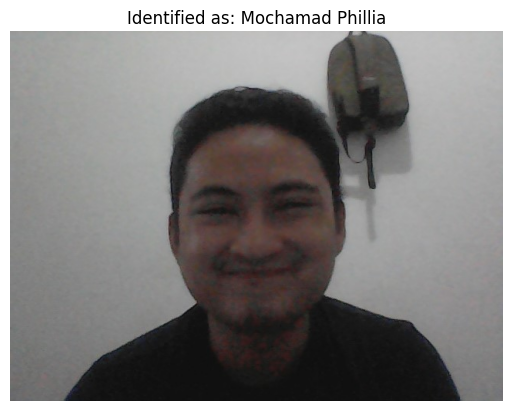

In [32]:
def load_database(database_path):
    with open(database_path, "rb") as file:
        database = pickle.load(file)
    return database

def preprocess_image(image_path, haar_cascade, target_size=(160, 160)):
    gbr1 = cv2.imread(image_path)
    wajah = haar_cascade.detectMultiScale(gbr1, 1.1, 4)
    
    if len(wajah) > 0:
        x1, y1, width, height = wajah[0]         
    else:
        return None
    
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    
    gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
    gbr = Image.fromarray(gbr)                  # konversi dari OpenCV ke PIL
    gbr_array = asarray(gbr)
    
    face = gbr_array[y1:y2, x1:x2]                        
    face = Image.fromarray(face)                       
    face = face.resize(target_size)
    face = asarray(face)
    
    face = expand_dims(face, axis=0)
    return face

def get_embedding(face, model):
    return model.embeddings(face)

def find_closest_match(embedding, database, threshold):
    min_dist = float("inf")
    identity = None
    
    for name, db_embedding in database.items():
        dist = np.linalg.norm(embedding - db_embedding)
        if dist < min_dist:
            min_dist = dist
            identity = name
    
    if min_dist > threshold:
        identity = "Tidak Dikenal"
    
    return identity, min_dist

def main(test_image_path, database_path, haar_cascade_path, threshold):
    HaarCascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + haar_cascade_path))
    MyFaceNet = FaceNet()
    
    database = load_database(database_path)
    face = preprocess_image(test_image_path, HaarCascade)
    
    if face is None:
        print("No face detected in the image.")
        return
    
    embedding = get_embedding(face, MyFaceNet)
    identity, distance = find_closest_match(embedding, database, threshold=threshold)
    
    print(f"Identified as: {identity} with distance: {distance}")
    plt.imshow(cv2.cvtColor(cv2.imread(test_image_path), cv2.COLOR_BGR2RGB))
    plt.title(f"Identified as: {identity}")
    plt.axis('off')
    plt.show()

# Uji gambar baru dengan nilai ambang yang disesuaikan
test_image_path = 'C:\\Users\\W10\\Documents\\TINGKAT 4\\SEMESTER 8\\Machine Learning\\UAS\\Philli_test.jpg'
database_path = 'Data_Penghuni_Rumahku.pkl'
haar_cascade_path = 'haarcascade_frontalface_default.xml'
threshold = 0.72  # Nilai threshold yang disesuaikan
main(test_image_path, database_path, haar_cascade_path, threshold)

Kode di atas adalah implementasi dari sebuah sistem pengenalan wajah menggunakan metode FaceNet. Berikut adalah alur kerjanya:

1. Load Database: Fungsi load_database digunakan untuk memuat database yang berisi representasi fitur wajah dari individu yang sudah terdaftar sebelumnya. Database ini disimpan dalam format pickle.

2. Preprocess Image: Fungsi preprocess_image menerima path gambar sebagai input dan melakukan pra-pemrosesan pada gambar tersebut. Langkah-langkahnya meliputi deteksi wajah menggunakan Cascade Classifier (Haar Cascade), mengekstrak wajah dari gambar, mengubah format gambar dari BGR (format yang digunakan oleh OpenCV) menjadi RGB (format yang digunakan oleh PIL), dan mengubah ukuran wajah menjadi ukuran yang sesuai dengan model FaceNet (160x160 piksel).

3. Get Embedding: Fungsi get_embedding digunakan untuk mendapatkan representasi fitur (embedding) dari wajah yang telah diproses menggunakan model FaceNet.

4. Find Closest Match: Fungsi find_closest_match digunakan untuk mencocokkan embedding wajah yang diuji dengan database wajah yang telah terdaftar sebelumnya. Pencocokan dilakukan dengan menghitung jarak (euclidean distance) antara embedding wajah yang diuji dengan setiap embedding wajah dalam database. Wajah dengan jarak terdekat akan dianggap sebagai hasil identifikasi. Threshold digunakan untuk menentukan apakah hasil identifikasi cukup dekat dengan wajah dalam database atau tidak.

5. Main Function: Fungsi main mengintegrasikan langkah-langkah sebelumnya untuk melakukan pengujian pada gambar baru. Input yang diperlukan adalah path gambar uji, path database, path Haar Cascade classifier, dan nilai threshold. Fungsi ini memuat database, memproses gambar uji, mendapatkan embedding dari gambar uji, dan melakukan pencocokan dengan database. Hasil identifikasi dan gambar uji beserta label hasil identifikasi ditampilkan.

6. Pengujian: Pada akhirnya, kita memanggil fungsi main dengan memberikan path gambar uji, path database, path Haar Cascade classifier, dan nilai threshold yang sesuai. Ini akan mengeksekusi proses pengujian dan menampilkan hasilnya.

PENGUJIAN PADA BANYAK GAMBAR (Foto Penghuni_Rumah)

In [37]:
def test_images_in_folder(folder_path, database_path, haar_cascade_path, threshold):
    HaarCascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + haar_cascade_path))
    MyFaceNet = FaceNet()
    
    database = load_database(database_path)
    total_images = 0
    unknown_count = 0
    
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):  # hanya memproses file gambar
            total_images += 1
            image_path = os.path.join(folder_path, filename)
            face = preprocess_image(image_path, HaarCascade)
            
            if face is None:
                print(f"No face detected in the image: {filename}")
                unknown_count += 1
                continue
            
            embedding = get_embedding(face, MyFaceNet)
            identity, distance = find_closest_match(embedding, database, threshold=threshold)
            
            if identity == "Tidak Dikenal":
                unknown_count += 1
            
            print(f"Identified {filename} as: {identity} with distance: {distance}\n")
    
    print(f"Total number of images in the folder: {total_images}")
    print(f"Total number of images identified as 'Tidak Dikenal': {unknown_count}")

# Folder yang berisi gambar-gambar untuk diuji
folder_path = 'C:\\Users\\W10\\Documents\\TINGKAT 4\\SEMESTER 8\\Machine Learning\\UAS\\Testing_Foto_Penghuni_Rumah'
database_path = 'Data_Penghuni_Rumahku.pkl'
haar_cascade_path = 'haarcascade_frontalface_default.xml'
threshold = 0.72  # Nilai threshold yang disesuaikan

test_images_in_folder(folder_path, database_path, haar_cascade_path, threshold)

1/1 [==============================] - 3s 3s/step
Identified Keyla (2).jpg as: My_Sister with distance: 0.5105258822441101

1/1 [==============================] - 0s 100ms/step
Identified Keyla (3).jpg as: My_Sister with distance: 0.6183093190193176

1/1 [==============================] - 0s 78ms/step
Identified Keyla (4).jpg as: My_Sister with distance: 0.706148624420166

1/1 [==============================] - 0s 78ms/step
Identified Keyla (5).jpg as: My_Sister with distance: 0.5341280102729797

1/1 [==============================] - 0s 76ms/step
Identified Mamah (1).jpg as: My_Mother with distance: 0.44987231492996216

1/1 [==============================] - 0s 76ms/step
Identified Mamah (3).jpg as: My_Mother with distance: 0.5862070918083191

1/1 [==============================] - 0s 79ms/step
Identified Mamah (4).jpg as: My_Mother with distance: 0.5923865437507629

1/1 [==============================] - 0s 99ms/step
Identified Mamah (5).jpg as: My_Mother with distance: 0.47009336948

PENGUJIAN PADA BANYAK GAMBAR (Foto Random)

In [38]:
def test_images_in_folder(folder_path, database_path, haar_cascade_path, threshold):
    HaarCascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + haar_cascade_path))
    MyFaceNet = FaceNet()
    
    database = load_database(database_path)
    total_images = 0
    unknown_count = 0
    
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):  # hanya memproses file gambar
            total_images += 1
            image_path = os.path.join(folder_path, filename)
            face = preprocess_image(image_path, HaarCascade)
            
            if face is None:
                print(f"No face detected in the image: {filename}")
                unknown_count += 1
                continue
            
            embedding = get_embedding(face, MyFaceNet)
            identity, distance = find_closest_match(embedding, database, threshold=threshold)
            
            if identity == "Tidak Dikenal":
                unknown_count += 1
            
            print(f"Identified {filename} as: {identity} with distance: {distance}\n")
    
    print(f"Total number of images in the folder: {total_images}")
    print(f"Total number of images identified as 'Tidak Dikenal': {unknown_count}")

# Folder yang berisi gambar-gambar untuk diuji
folder_path = 'C:\\Users\\W10\\Documents\\TINGKAT 4\\SEMESTER 8\\Machine Learning\\UAS\\Foto_Random'
database_path = 'Data_Penghuni_Rumahku.pkl'
haar_cascade_path = 'haarcascade_frontalface_default.xml'
threshold = 0.72  # Nilai threshold yang disesuaikan

test_images_in_folder(folder_path, database_path, haar_cascade_path, threshold)

No face detected in the image: Afrika__1.jpg
1/1 [==============================] - 3s 3s/step
Identified Afrika__11.jpg as: Tidak Dikenal with distance: 1.2050728797912598

1/1 [==============================] - 0s 83ms/step
Identified Afrika__12.jpg as: Tidak Dikenal with distance: 1.3123235702514648

1/1 [==============================] - 0s 89ms/step
Identified Afrika__17.jpg as: Tidak Dikenal with distance: 1.300481915473938

1/1 [==============================] - 0s 84ms/step
Identified Afrika__19.jpg as: Tidak Dikenal with distance: 1.104960560798645

1/1 [==============================] - 0s 100ms/step
Identified Afrika__23.jpg as: Tidak Dikenal with distance: 1.2629626989364624

1/1 [==============================] - 0s 89ms/step
Identified Afrika__24.jpg as: Tidak Dikenal with distance: 1.4185787439346313

1/1 [==============================] - 0s 65ms/step
Identified Afrika__3.jpg as: Tidak Dikenal with distance: 1.254522442817688

No face detected in the image: Afrika__4.jp

Fungsi test_images_in_folder digunakan untuk menguji serangkaian gambar dalam suatu folder. Berikut adalah alur kerjanya:

1. Load Dependencies: Fungsi ini dimulai dengan memuat Cascade Classifier (Haar Cascade) dan model FaceNet yang diperlukan.

2. Load Database: Database wajah yang sudah terdaftar sebelumnya dimuat menggunakan fungsi load_database.

3. Iterate Through Images: Fungsi ini mengiterasi setiap file dalam folder yang diberikan. Hanya file gambar dengan ekstensi .jpg, .jpeg, atau .png yang akan diproses.

4. Preprocess Image and Get Embedding: Untuk setiap gambar, fungsi ini melakukan pra-pemrosesan untuk mendeteksi wajah menggunakan Haar Cascade, mengambil wajah dari gambar, mengonversi format gambar, mengubah ukuran wajah, dan mendapatkan embedding wajah menggunakan model FaceNet.

5. Find Closest Match: Setelah embedding wajah didapatkan, fungsi ini mencari wajah terdekat dalam database dengan menggunakan fungsi find_closest_match.

6. Print Results: Hasil identifikasi untuk setiap gambar ditampilkan, termasuk nama file, identitas yang teridentifikasi, dan jaraknya. Jika identitas adalah "Tidak Dikenal", maka gambar tersebut dianggap tidak dikenal.

7. Print Summary: Setelah semua gambar diproses, fungsi ini mencetak ringkasan jumlah total gambar yang diproses dan jumlah gambar yang diidentifikasi sebagai "Tidak Dikenal".

8. Test the Images: Akhirnya, kita memanggil fungsi test_images_in_folder dengan memberikan path folder gambar, path database, path Haar Cascade classifier, dan nilai threshold yang sesuai. Ini akan mengeksekusi proses pengujian pada semua gambar dalam folder tersebut dan menampilkan hasilnya.

REAL-TIME FACE RECOGNITION

In [5]:
# Define threshold for face recognition
threshold = 0.72

# Initialize video capture
cap = cv2.VideoCapture(0)

while True:
    _, gbr1 = cap.read()
    
    wajah = HaarCascade.detectMultiScale(gbr1, 1.1, 4)
    
    if len(wajah) > 0:
        x1, y1, width, height = wajah[0]
        x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + width, y1 + height
        
        gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
        gbr = Image.fromarray(gbr)  # Konversi dari OpenCV ke PIL
        gbr_array = asarray(gbr)
        
        face = gbr_array[y1:y2, x1:x2]
        
        face = Image.fromarray(face)
        face = face.resize((160, 160))
        face = asarray(face)
        
        face = expand_dims(face, axis=0)
        signature = MyFaceNet.embeddings(face)
        
        min_dist = float("inf")
        identity = "Unknown"
        for key, value in database.items():
            dist = np.linalg.norm(value - signature)
            if dist < min_dist:
                min_dist = dist
                identity = key
        
        if min_dist > threshold:
            identity = "Tidak Dikenal"
        
        cv2.putText(gbr1, identity, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2, cv2.LINE_AA)
        cv2.rectangle(gbr1, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    cv2.imshow('Face Recognition', gbr1)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27 or k == ord('q'):  # Esc key or 'q' key to exit
        break
        
cv2.destroyAllWindows()
cap.release()

1/1 [==============================] - 0s 255ms/step


Potongan kode yang diberikan adalah sebuah skrip Python untuk pengenalan wajah secara real-time menggunakan webcam. Berikut cara kerjanya:

1. Inisialisasi Variabel: Nilai ambang untuk pengenalan wajah didefinisikan di awal.

2. Inisialisasi Pengambilan Video: cv2.VideoCapture(0) menginisialisasi webcam untuk pengambilan video.

3. Loop Utama: Skrip memasuki loop yang secara terus-menerus menangkap bingkai dari webcam.

4. Deteksi Wajah: Setiap bingkai (gbr1) yang diambil dari webcam diproses untuk mendeteksi wajah menggunakan classifier Haar Cascade (HaarCascade). Wajah yang terdeteksi disimpan dalam variabel wajah.

5. Pengenalan Wajah: Jika wajah terdeteksi, skrip mengekstrak wilayah wajah dari bingkai dan memprosesnya untuk sesuai dengan format yang dibutuhkan oleh model FaceNet (MyFaceNet). Embedding (atau tanda tangan) dari wajah kemudian dihitung menggunakan model FaceNet.

6. Pembandingan Database: Embedding yang dihitung dari wajah dibandingkan dengan embedding yang disimpan di dalam database. Identitas dari pencocokan terdekat ditentukan berdasarkan jarak Euclidean minimum.

7. Tampilkan Hasil: Identitas dari wajah yang terdeteksi (atau "Tidak Dikenal" jika tidak terdeteksi) ditampilkan pada bingkai bersama dengan kotak pembatas di sekitar wajah yang terdeteksi.

8. Kondisi Keluar: Loop terus berlanjut sampai pengguna menekan tombol 'Esc' atau tombol 'q', yang memicu kondisi keluar, menutup jendela dan melepaskan sumber daya pengambilan video.

Skrip ini memberikan demonstrasi sederhana tentang pengenalan wajah secara real-time menggunakan OpenCV untuk deteksi wajah dan model FaceNet yang telah dilatih sebelumnya untuk pengenalan wajah.

In [6]:
# Define threshold for face recognition
threshold = 0.72

# Initialize video capture
cap = cv2.VideoCapture(0)

while True:
    _, gbr1 = cap.read()
    
    wajah = HaarCascade.detectMultiScale(gbr1, 1.1, 4)
    
    if len(wajah) > 0:
        x1, y1, width, height = wajah[0]
        x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + width, y1 + height
        
        gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
        gbr = Image.fromarray(gbr)
        gbr_array = asarray(gbr)
        
        face = gbr_array[y1:y2, x1:x2]
        
        face = Image.fromarray(face)
        face = face.resize((160, 160))
        face = asarray(face)
        
        face = expand_dims(face, axis=0)
        signature = MyFaceNet.embeddings(face)
        
        min_dist = float("inf")
        identity = "Tidak Dikenal"
        for key, value in database.items():
            dist = np.linalg.norm(value - signature)
            if dist < min_dist:
                min_dist = dist
                identity = key
        
        if min_dist > threshold:
            identity = "Tidak Dikenal"
        else:
            identity = "Penghuni_Rumah"
        
        cv2.putText(gbr1, identity, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2, cv2.LINE_AA)
        cv2.rectangle(gbr1, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    cv2.imshow('Face Recognition', gbr1)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27 or k == ord('q'):
        break
        
cv2.destroyAllWindows()
cap.release()

1/1 [==============================] - 0s 183ms/step


Modifikasi utama adalah pada bagian yang mengidentifikasi wajah. Jika jarak terdekat (min_dist) lebih kecil dari ambang batas (threshold), wajah diidentifikasi sebagai "Penghuni_Rumah". Jika lebih besar, wajah diidentifikasi sebagai "Tidak Dikenal".